# Music Recommendation Notebook

## Business Understanding 



In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate



In [14]:
pd.set_option('display.max_columns', 500)

Loading my cleaned dataframe from my Explore notebook.

In [15]:
df = pd.read_csv('final_df.csv', index_col=0)

In [26]:
df.describe()

,track_popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artist_popularity
count,470038.000000,4.700380e+05,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,4.700380e+05,470038.000000
mean,28.392524,2.267375e+05,0.034987,0.565913,0.555447,5.223099,-9.883890,0.664434,0.100757,0.429147,0.093756,0.213999,0.564334,119.226204,3.879657,1.064992e+06,50.310469
std,17.494863,1.147592e+05,0.183746,0.159077,0.244112,3.520338,4.618667,0.472189,0.178089,0.339304,0.241880,0.185237,0.252629,29.704765,0.456678,3.851286e+06,19.688863
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,15.000000,1.756470e+05,0.000000,0.460000,0.367000,2.000000,-12.489000,0.000000,0.033200,0.088800,0.000000,0.098000,0.361000,96.361000,4.000000,1.295900e+04,38.000000
50%,28.000000,2.147870e+05,0.000000,0.577000,0.560000,5.000000,-9.137000,1.000000,0.042800,0.394000,0.000019,0.139000,0.576000,118.041000,4.000000,9.399400e+04,52.000000
75%,41.000000,2.615162e+05,0.000000,0.682000,0.755000,8.000000,-6.471000,1.000000,0.071300,0.746000,0.005120,0.278000,0.778000,137.293500,4.000000,5.953350e+05,65.000000
max,99.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,7.890023e+07,100.000000


In [27]:
df.describe(include="O")

,track_id,track_name,release_date,artist_id,genres,artist_name
count,470038,470038,470038,470038,432228,470038
unique,470038,358182,18896,55682,18524,55111
top,1NyOfJ2HWWVNFALoglHljk,Summertime,1998-01-01,3meJIgRw7YleJrmbpbJK6S,hoerspiel,Die drei ???
freq,1,86,2571,3856,8027,3856


Looking at unique values in genres so that I can potentially start trying to predict genre based on song features such as danceability, energy, loudness, etc. 

In [29]:
df['genres'].unique()

array([nan, 'tango, vintage tango',
       'adult standards, big band, easy listening, lounge, swing', ...,
       'anthem worship, deep ccm, world worship',
       'anthem worship, roots worship',
       'alt z, alternative r&b, bedroom pop, indie cafe pop, indie pop, pop'],
      dtype=object)

Finding a genre with a large enough presence in my dataframe to make a solid starter model.

In [36]:
df['genres'].str.contains('pop').sum() / len(df)

0.42205949306226304

In [35]:
df.duplicated(subset='track_id').sum()

0

Looking at the distribution of popularity scores so that I can also make predictions on how popular a track will be given a song's features.

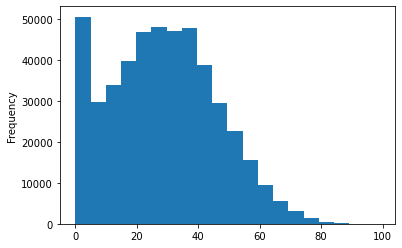

In [40]:
df['track_popularity'].plot(kind='hist', bins=20);

In [41]:
df['track_popularity'].describe()

count    470038.000000
mean         28.392524
std          17.494863
min           0.000000
25%          15.000000
50%          28.000000
75%          41.000000
max          99.000000
Name: track_popularity, dtype: float64

In [45]:
len(df[df['track_popularity'] > 30]) / len(df)

0.45150817593471165

The threshold of predicting songs that score higher than 30 gives me a good sample of data to make predictions off of. 